a) Do zmiennej miasta zostają przypisane dane z pliku miasta.csv. Wartości dla tabeli miasta.values powinny wyglądać następująco:

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'C:\Studia\Inteligencja obliczeniowa\Inteligencja-obliczeniowa\lab01\miasta.csv'

miasta = pd.read_csv(path)
print(miasta.values)

[[1900  170  110  210]
 [1925  210  220  254]
 [1939  250  274  287]
 [1946  117  267   72]
 [1950  194  320  178]
 [1960  286  408  269]
 [1970  365  471  338]
 [1980  456  552  388]
 [1990  465  590  413]
 [2000  462  574  416]]


b) Dodanie do tabeli wiersza z ludnością w 2010 roku: 2010,460,555,405, czyli 'Rok', 'Gdansk', 'Poznan', 'Szczecin'. Następnie do zmiennej
miasta dodawany jest ten wiersz z danymi z ignore_index=True, tak aby był on na końcu tablicy miasta z indeksem 10, a nie 0.

In [14]:
row = pd.DataFrame({'Rok': [2010], 'Gdansk': [460], 'Poznan': [555], 'Szczecin': [405]})
miasta = miasta.append(row, ignore_index=True)
print(miasta)

     Rok  Gdansk  Poznan  Szczecin
0   1900     170     110       210
1   1925     210     220       254
2   1939     250     274       287
3   1946     117     267        72
4   1950     194     320       178
5   1960     286     408       269
6   1970     365     471       338
7   1980     456     552       388
8   1990     465     590       413
9   2000     462     574       416
10  2010     460     555       405


C:\Users\Piotr\AppData\Local\Temp\ipykernel_18484\265174667.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  miasta = miasta.append(row, ignore_index=True)


c) Stworzenie wykresu dla ludności Gdańska. Wykres jest liniowy z punktami, w kolorze czerwonym z odpowiednimi tytułami. Używany jest matplotlib.

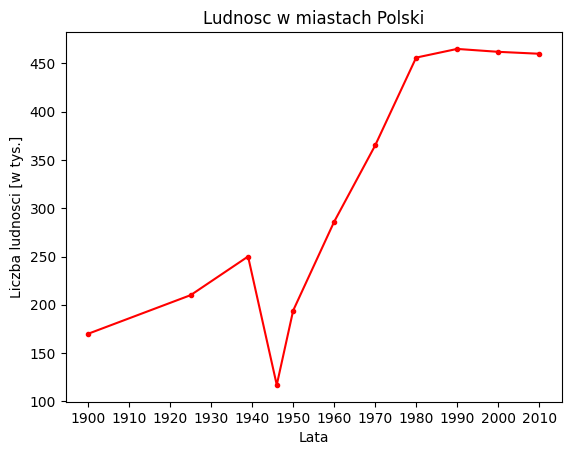

In [15]:
miasta.plot(kind='line', x='Rok', xticks=np.arange(miasta.Rok.min(), miasta.Rok.max() + 1, 10), y='Gdansk', color='red',
            xlabel="Lata", ylabel='Liczba ludnosci [w tys.]', legend=False,
            title='Ludnosc w miastach Polski', style='.-')
plt.show()

d) Dodatkowy wykres, z wszystkimi miastami wraz z legendą. Ponownie liniowy z punktami.

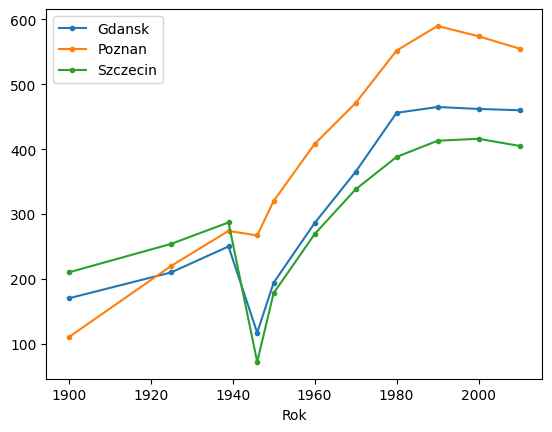

In [16]:
miasta.plot(kind='line', x='Rok', style='.-')
plt.show()

e) Policzenie standaryzacji oraz wypisanie średniej i odchylenia standardowego. Średnia jest bliska zeru, a odchylenie standardowe dla wszystkich miast i wynosi 1.

In [17]:
print("\nStandaryzacja")

def standaryzacja(col):
    return (col - col.mean()) / col.std()

miasta_standaryzowane = miasta[['Gdansk', 'Poznan', 'Szczecin']].apply(standaryzacja, axis=0)

print(miasta_standaryzowane)

srednia = miasta_standaryzowane.mean()
odchylenie = miasta_standaryzowane.std()
print("\nŚrednia:")
print(srednia)
print("\nOdchylenie standardowe:")
print(odchylenie)


Standaryzacja
      Gdansk    Poznan  Szczecin
0  -1.065200 -1.717176 -0.750452
1  -0.765719 -1.053560 -0.355649
2  -0.466238 -0.727784 -0.059547
3  -1.462013 -0.770014 -1.988698
4  -0.885512 -0.450272 -1.037581
5  -0.196705  0.080621 -0.221057
6   0.394771  0.460692  0.398066
7   1.076091  0.949355  0.846706
8   1.143474  1.178605  1.071025
9   1.121013  1.082079  1.097944
10  1.106039  0.967454  0.999243

Średnia:
Gdansk      1.211152e-16
Poznan      6.055762e-17
Szczecin    7.065056e-17
dtype: float64

Odchylenie standardowe:
Gdansk      1.0
Poznan      1.0
Szczecin    1.0
dtype: float64


f) Policzenie normalizacji oraz wypisanie wartości minimalnej i maksymalnej. Wartości minimalna dla wszystkich miast wyszła 0, a maksymalna 1.

In [18]:
print("\nNormalizacja")

def normalizacja(col):
    return (col - col.min()) / (col.max() - col.min())

miasta_normalizowane = miasta[['Gdansk', 'Poznan', 'Szczecin']].apply(normalizacja, axis=0)

print(miasta_normalizowane)

minimal = miasta_normalizowane.min()
maximum = miasta_normalizowane.max()
print("\nMin:")
print(minimal)
print("\nMax:")
print(maximum)


Normalizacja
      Gdansk    Poznan  Szczecin
0   0.152299  0.000000  0.401163
1   0.267241  0.229167  0.529070
2   0.382184  0.341667  0.625000
3   0.000000  0.327083  0.000000
4   0.221264  0.437500  0.308140
5   0.485632  0.620833  0.572674
6   0.712644  0.752083  0.773256
7   0.974138  0.920833  0.918605
8   1.000000  1.000000  0.991279
9   0.991379  0.966667  1.000000
10  0.985632  0.927083  0.968023

Min:
Gdansk      0.0
Poznan      0.0
Szczecin    0.0
dtype: float64

Max:
Gdansk      1.0
Poznan      1.0
Szczecin    1.0
dtype: float64
